<a href="https://colab.research.google.com/github/ensondev/MachineLearning-Agricultura/blob/main/Algoritmo%20XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados correctamente
   numfila  Departamento     Municipio      Cultivo          Estado  \
0      NaN  CUNDINAMARCA  BOGOTÁ. D.C.  Papa de año  POR ESTABLECER   
1      NaN          META       ACACÍAS     Citricos     ESTABLECIDO   
2      NaN          META       ACACÍAS     Aguacate     ESTABLECIDO   
3      NaN          META       ACACÍAS        Cacao     ESTABLECIDO   
4      NaN          META       ACACÍAS        Cacao     ESTABLECIDO   

  Tiempo Establecimiento Topografia  Drenaje Riego  \
0                     ND  Pendiente    Bueno    ND   
1         mas de 10 años      Plano    Bueno    ND   
2         mas de 10 años      Plano  Regular    ND   
3         mas de 10 años      Plano    Bueno    ND   
4         de 5 a 10 años      Plano    Bueno    ND   

         Fertilizantes aplicados  ...  Zinc (Zn) disponible doble  cido mg/kg  \
0  15-1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


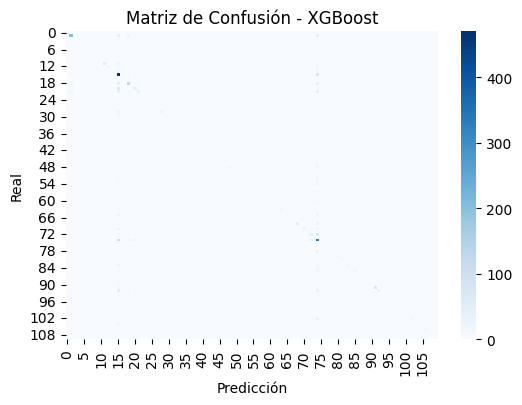

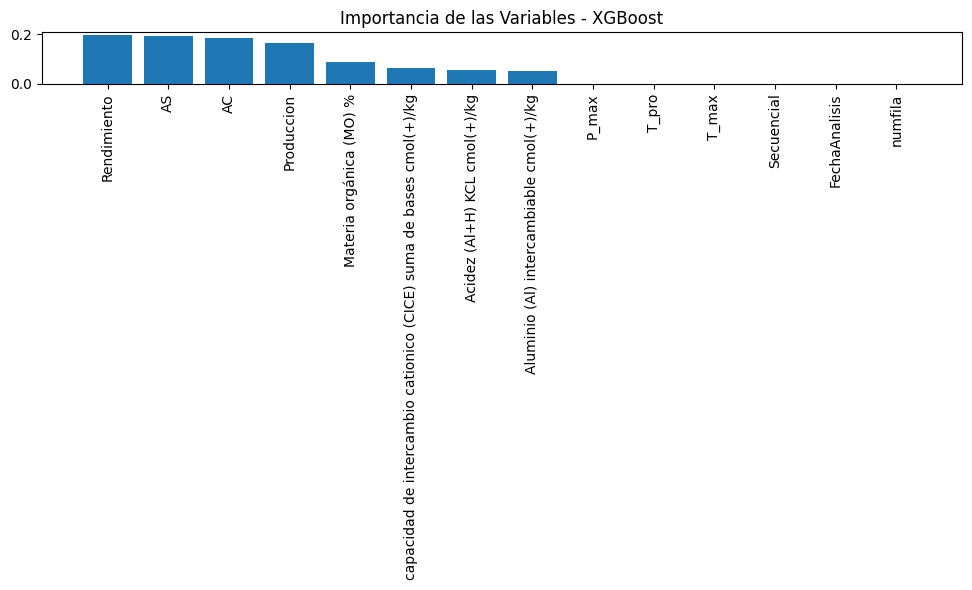


✅ CONCLUSIÓN:
El modelo XGBoost se entrenó correctamente utilizando un conjunto multiclase con cultivos.
Se filtraron las clases con pocos datos para mejorar la estabilidad del modelo.
Puedes optimizar el rendimiento ajustando hiperparámetros como:
- max_depth (profundidad de los árboles)
- learning_rate (tasa de aprendizaje)
- n_estimators (número de árboles)



In [19]:
# --- 1. MONTAJE DEL DRIVE ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2. IMPORTAR LIBRERÍAS ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- 3. CARGAR LOS DATOS LIMPIOS ---
ruta_datos = '/content/drive/MyDrive/Colab Notebooks/Datos procesados/Completo_1.csv'
data = pd.read_csv(ruta_datos)
print("✅ Datos cargados correctamente")
print(data.head())
print("Columnas totales:", len(data.columns))

# --- 4. LIMPIEZA Y PREPARACIÓN DE DATOS ---
# Convertir valores no numéricos (ND, vacíos) a NaN y luego a 0
data = data.replace("ND", np.nan)
data = data.fillna(0)

# Variable objetivo (cultivo)
y = data['Cultivo']

# Variables predictoras: nos quedamos con las columnas numéricas
X = data.select_dtypes(include=[np.number])

# Codificación de la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("✅ Variable objetivo codificada correctamente.")
print("Número de clases:", len(le.classes_))
print("Ejemplo de clases:", le.classes_[:10])

# --- 5. ELIMINAR CLASES CON POCOS REGISTROS ---
# --- 5. ELIMINAR CLASES CON POCOS REGISTROS ---
# Convertir y_encoded en Serie para usar .isin()
y_series = pd.Series(y_encoded)

frecuencias = y_series.value_counts()
clases_validas = frecuencias[frecuencias >= 5].index

# Filtrar solo las clases con suficientes datos
X_filtrado = X[y_series.isin(clases_validas)]
y_filtrado = y_series[y_series.isin(clases_validas)]

print(f"✅ Clases filtradas: {len(clases_validas)} (de {len(le.classes_)})")
print("Filas finales después del filtrado:", len(X_filtrado))


# --- 6. DIVISIÓN DE DATOS (estratificada) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y_filtrado, test_size=0.2, random_state=42, stratify=y_filtrado
)

# --- 7. REINDEXAR CLASES ---
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y_train = le2.fit_transform(y_train)
y_test = le2.transform(y_test)

num_clases = len(le2.classes_)
print(f"✅ Etiquetas reindexadas correctamente. Total de clases: {num_clases}")

print("Entrenando modelo XGBoost... ⏳")
model.fit(X_train, y_train)
print("✅ Entrenamiento completado")

# --- 8. PREDICCIONES Y MÉTRICAS ---
y_pred = model.predict(X_test)

print("\n🔹 Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred), 3))
print("\n🔹 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# --- 9. MATRIZ DE CONFUSIÓN ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# --- 10. IMPORTANCIA DE VARIABLES ---
plt.figure(figsize=(10,6))
xgb_importances = model.feature_importances_
indices = np.argsort(xgb_importances)[::-1]

plt.bar(range(len(X.columns)), xgb_importances[indices])
plt.xticks(range(len(X.columns)), X.columns[indices], rotation=90)
plt.title('Importancia de las Variables - XGBoost')
plt.tight_layout()
plt.show()

# --- 11. CONCLUSIÓN ---
print("""
✅ CONCLUSIÓN:
El modelo XGBoost se entrenó correctamente utilizando un conjunto multiclase con cultivos.
Se filtraron las clases con pocos datos para mejorar la estabilidad del modelo.
Puedes optimizar el rendimiento ajustando hiperparámetros como:
- max_depth (profundidad de los árboles)
- learning_rate (tasa de aprendizaje)
- n_estimators (número de árboles)
""")
